
# Project: Investigate a Dataset - [Tmdb- The Movie Database]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset contains 10866 rows of information on cast, revenue, budget, ratings, 
popularity, movies and other features. It was collected from The Movie Database (TMDb) on Kaggle.

> There are 21 columns in this dataset namely:
id, imdb_id, popularity, budget, revenue,
original_title, cast, homepage, director
,tagline,keywords, overview, runtime, genres,
production_companies, release_date,
vote_count, vote_average, release_year, budget_adj, and revenue_adj.
 
> Columns like genre, popularity, revenue, budget, runtime and vote_count are Important as they are
useful in getting insights on how they affect viewers choice of movies.


### Questions for Analysis

> Questiion 1

> Are movies popularity affected by the month it was released.

> Question 2

> What are the genres mostly associated with high popularity

> Question 3

> What relationship does runtime have with popularity



In [1]:
# Importing libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

C:\Users\DELL\AppData\Local\Temp\ipykernel_4784\667349106.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
Matplotlib is building the font cache; this may take a moment.
UsageError: Line magic function `%` not found.


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0


    100% |████████████████████████████████| 10.5MB 4.0MB/s eta 0:00:01  5% |█▊                              | 552kB 28.6MB/s eta 0:00:01    31% |██████████                      | 3.3MB 29.2MB/s eta 0:00:01    70% |██████████████████████▋         | 7.4MB 26.8MB/s eta 0:00:01    83% |██████████████████████████▊     | 8.7MB 28.3MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 3.0MB/s eta 0:00:01   10% |███▎                            | 1.4MB 26.2MB/s eta 0:00:01    59% |███████████████████             | 8.0MB 26.3MB/s eta 0:00:01    78% |█████████████████████████▏      | 10.5MB 26.7MB/s eta 0:00:01    88% |████████████████████████████▎   | 11.8MB 27.0MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully unins

<a id='wrangling'></a>
## Data Wrangling

> Loading and exploring dataset


In [2]:
df = pd.read_csv('tmdb-movies.csv')


In [3]:
# setting the display option for column to max to display all columns

pd.set_option('display.max_columns', None)

In [4]:
# I'm going to take a look at my dataframe

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# Checking the shape of the dataframe
df.shape

(10866, 21)

In [6]:
# Checking the number of missing values in each columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

**From above, some of the columns have missing values. However, homepage, tagline,
keywords, and production_company columns have the most missing values.**





In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**The min, 25% and 50% valaues are zero for the budget and revenue columns. The runtime column min value is also zero.
This shouldn't be so. A movie cannot have zero values for budget, revenue and runtime. I'll take a look at these columns when 
cleaning the data.**



### Data Cleaning

> **To start with, I'll be dropping some columns,
check for missing values and duplicate rows.**



In [8]:
# Dropping columns I won't be making use of

df.drop(columns= ['homepage','tagline','keywords','overview'
                  ,'production_companies'], inplace = True)

In [9]:
#Checking for missing values

df.isnull().sum()

id                 0
imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [10]:
#Extracting rows with missing values

df[df.isnull().any(axis=1)].head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,345637,tt4661600,0.422901,0,0,Sanjay's Super Team,NaN,Sanjay Patel,7,Animation,11/25/15,47,6.9,2015,0.0,0.0
424,363869,tt4835298,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,100,NaN,10/29/15,21,6.1,2015,0.0,0.0
441,355020,tt4908644,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,98,Documentary,10/9/15,37,8.2,2015,0.0,0.0
465,321109,tt4393514,0.201696,0,0,Bitter Lake,NaN,Adam Curtis,135,Documentary,1/24/15,19,7.8,2015,0.0,0.0
532,320996,tt4073952,0.126594,0,0,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,NaN,71,Comedy,1/23/15,14,6.6,2015,0.0,0.0


**cast, director, genres and imdb_id columns contains some missing values.
Since the number of missing values is small, I will be dropping the rows.**


In [11]:
#dropping missing values

df.dropna(axis = 0, inplace = True)

In [12]:
# Checking if dataframe still contains missing values

df[df.isnull().any(axis=1)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [13]:
# Checking for duplicates

df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,110,5.0,2010,30000000.0,967000.0


**The dataframe only contains 1 duplicate.**

In [14]:
# Dropping duplicate rows

df.drop_duplicates(inplace= True)

In [15]:
#Checking if dataframe still contains duplicates

df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


**Now, let's recheck the description of the data**

In [16]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10726.000000,10726.000000,1.072600e+04,1.072600e+04,10726.000000,10726.000000,10726.000000,10726.000000,1.072600e+04,1.072600e+04
mean,65185.765337,0.652779,1.481055e+07,4.033868e+07,102.493660,219.905090,5.964218,2001.256013,1.777358e+07,5.203047e+07
std,91466.133316,1.004995,3.107015e+07,1.176766e+08,30.473355,578.934433,0.930185,12.821962,3.447220e+07,1.454547e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10546.250000,0.210766,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20310.500000,0.387135,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,73938.500000,0.721518,1.600000e+07,2.500394e+07,112.000000,148.000000,6.600000,2011.000000,2.112691e+07,3.475061e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**The zero values we noted earlier for the revenue, budget, and runtime are still showing. So, let's check what's causing this.**

In [17]:
# Filtering out zero values from the budget, revenue and runtime columns

df.query('runtime == 0')


,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,12/19/15,11,5.4,2015,0.000000e+00,0.0
334,361931,tt5065822,0.357654,0,0,Ronaldo,Cristiano Ronaldo,Anthony Wonke,0,Documentary,11/9/15,80,6.5,2015,0.000000e+00,0.0
410,339342,tt2948712,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,Kenny Gage|Devon Downs,0,Horror,1/1/15,15,5.6,2015,0.000000e+00,0.0
445,353345,tt3800796,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,Steven R. Monroe,0,Horror,10/9/15,52,5.0,2015,0.000000e+00,0.0
486,333653,tt4058368,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,Nancy Savoca,0,TV Movie|Drama,4/5/15,11,5.4,2015,0.000000e+00,0.0
595,341051,tt2914740,0.028725,0,0,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,Michael Medaglia,0,Horror,1/1/15,11,4.6,2015,0.000000e+00,0.0
616,325843,tt4333210,0.026797,0,0,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,Michael Goldfine,0,Drama|Comedy,11/10/15,20,6.6,2015,0.000000e+00,0.0
1289,286372,tt1791681,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,Michael G. Bartlett,0,Thriller|Horror|Mystery,10/20/14,16,3.4,2014,2.993546e+06,0.0
1293,286256,tt3134058,0.036904,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,Mauro Lima,0,Documentary|Drama|Music,10/30/14,14,6.0,2014,0.000000e+00,0.0
1849,18247,tt1212986,0.120350,0,0,Spectacular!,Nolan Gerard Funk|Jesse Moss|Britt Irvin|Tammi...,Robert Iscove,0,Drama|Music,2/16/09,13,5.2,2009,0.000000e+00,0.0


**The number of rows with zeros in the runtime column are small and since a movie cannot have zero runtime, I'll just drop them.**


In [19]:

df.drop(df.query('runtime == 0').index, axis = 0, inplace = True)

In [20]:
# checking if there are still rows with zeros in the runtime column

df.query('runtime == 0')

TypeError: __init__() got an unexpected keyword argument 'max_rows'

Empty DataFrame
Columns: [id, imdb_id, popularity, budget, revenue, original_title, cast, director, runtime, genres, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj]
Index: []

In [21]:
df.query('budget==0')

TypeError: __init__() got an unexpected keyword argument 'max_rows'

           id    imdb_id  popularity  budget    revenue  \
30     280996  tt3168230    3.927333       0   29355203   
36     339527  tt1291570    3.358321       0   22354572   
72     284289  tt2911668    2.272044       0      45895   
74     347096  tt3478232    2.165433       0          0   
75     308369  tt2582496    2.141506       0          0   
88     301875  tt3289728    1.959765       0    2000000   
95     258509  tt2974918    1.841779       0  233755553   
100    326359  tt4007502    1.724712       0          0   
101    254302  tt0462335    1.661789       0          0   
103    292040  tt3321300    1.646664       0          0   
116    297291  tt3086386    1.380320       0          0   
119     86828  tt1727770    1.360827       0    5189646   
122    277355  tt1945084    1.342839       0          0   
125    223485  tt3205376    1.329702       0     229094   
128    309245  tt2872462    1.293140       0    2500431   
130    245706  tt2273657    1.284541       0    4719695 

**The number of rows with zeros in the budget
column is 5549. About 51% of the whole dataset.
This number is quite high. Since, I can't drop the columns with 
zeros, I'll just leave it.**


# Data Exploratory Analysis

#### Question 1
>Does the month by which the movie was released affect the revenue 
and if so what genre thrive most.


To answer the first analysis question. 
I have to change the release_date column to the right format

In [22]:
# I need to have the release_date column in right format

df['release_date']= pd.to_datetime(df['release_date'])


In [23]:
#I'm going to create a month column and change the month from number to a three letter notation


month_mapping ={1: 'Jan', 2:'Feb', 3:'Mar', 4:'Apr',
                5:'May', 6:'Jun', 7:'Jul', 8:'Aug',
                9:'Sep',10:'Oct', 11: 'Nov', 12:'Dec'}

df['month'] = df['release_date'].dt.month.map(month_mapping)

**Now that I have the month column, I can group by month and visualize.**

In [24]:

df_Popularity_Month = df.groupby(['release_year','month'])['popularity'].mean()

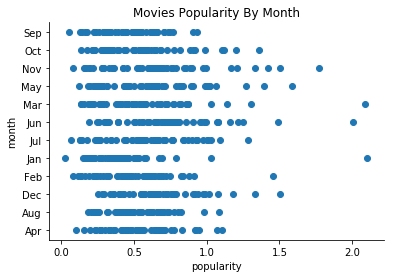

In [25]:
# Getting a visual of the dataframe
dfm = df_Popularity_Month
plt.scatter(dfm, dfm.index.get_level_values(1))
plt.title('Movies Popularity By Month')
plt.xlabel('popularity')
plt.ylabel('month')
sns.despine()


**There doesn't seem to be much correlation between month released and popularity going by this. However, let's take a look at the last 6years to check the trends in popularity.**

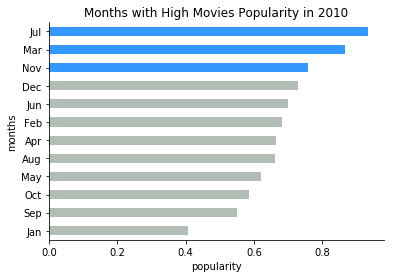

In [26]:
#Visualizing year 2010


color =['#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5', '#3399ff','#3399ff','#3399ff']

df_Popularity_Month.loc[2010].sort_values().plot(kind= 'barh', color=color)

plt.title('Months with High Movies Popularity in 2010')
plt.xlabel('popularity')
plt.ylabel('months')
sns.despine()




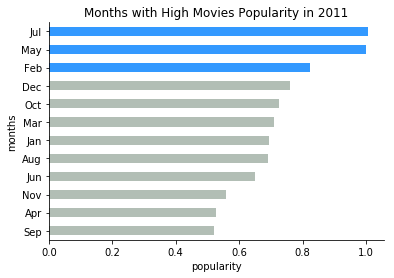

In [27]:
#visualizing year 2011

color =['#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5', '#3399ff','#3399ff','#3399ff']

df_Popularity_Month.loc[2011].sort_values().plot(kind= 'barh', color=color)

plt.title('Months with High Movies Popularity in 2011')
plt.xlabel('popularity')
plt.ylabel('months')
sns.despine()




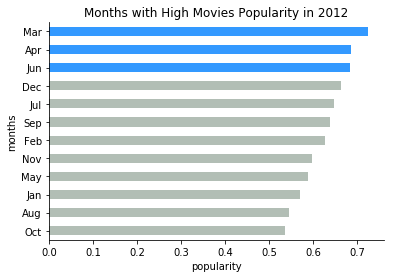

In [28]:
#Visualizing year 2012


color =['#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5', '#3399ff','#3399ff','#3399ff']

df_Popularity_Month.loc[2012].sort_values().plot(kind= 'barh', color=color)

plt.title('Months with High Movies Popularity in 2012')
plt.xlabel('popularity')
plt.ylabel('months')
sns.despine()



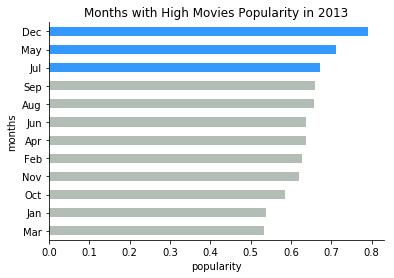

In [29]:
#Visualizing year 2013

color =['#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5', '#3399ff','#3399ff','#3399ff']

df_Popularity_Month.loc[2013].sort_values().plot(kind= 'barh', color=color)

plt.title('Months with High Movies Popularity in 2013')
plt.xlabel('popularity')
plt.ylabel('months')
sns.despine()



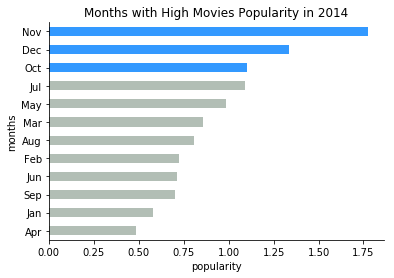

In [30]:
#Visualizing year 2014

color =['#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5', '#3399ff','#3399ff','#3399ff']

df_Popularity_Month.loc[2014].sort_values().plot(kind= 'barh', color=color)

plt.title('Months with High Movies Popularity in 2014')
plt.xlabel('popularity')
plt.ylabel('months')
sns.despine()



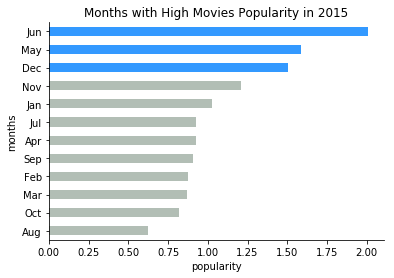

In [31]:
#Visualizing year 2015

color =['#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5',
        '#b2beb5','#b2beb5','#b2beb5', '#3399ff','#3399ff','#3399ff']

df_Popularity_Month.loc[2015].sort_values().plot(kind= 'barh', color=color)

plt.title('Months with High Movies Popularity in 2015')
plt.xlabel('popularity')
plt.ylabel('months')
sns.despine()


This is quite interesting. I highlighted the first three months with the highest popularity in each year and its interesting to see that movies released in Jan are not really that popular. There was an observable increase in popularity from Feb to July
with May, Jun, and July having the most popularity. Movies released in Nov and Dec are also mostly popular.


#### Analysis Question 2

> Does genres affect popularity

In [33]:
#There are more than one genre in a row, so I'm going to split them.

df['genres'] = df['genres'].apply(lambda x: x.split('|'))
                                                  

In [34]:
#Exploding genres column
df_genres = df.explode('genres')

AttributeError: 'DataFrame' object has no attribute 'explode'

In [ ]:
# Grouping by genres column

df_genres = df_genres.groupby('genres')['popularity'].mean()


In [ ]:
#Visualizing

color =['#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5','#b2beb5', '#3399ff','#3399ff','#3399ff']


df_genres.sort_values().plot(kind='barh', color = color)

plt.title('Popular Genres')
plt.xlabel('popularity')
sns.despine()

The most popular genres are adventure, science fiction, and fantasy. Action and animation genres are also well received but I just want to stick with the first three genres.


#### Analysis Question 3

> How does movies runtime afffect popularity

In [ ]:
#let's take a look at our dataframe again

df



In [ ]:
#Visualizing the relationship between runtime and popularity


plt.scatter(df['runtime'], df['popularity'])

plt.xlabel('movie runtime (mins)')
plt.ylabel('popularity')
plt.title('Movies Length and Popularity')
sns.despine()


Movies with high popularity are mostly around the first 200 mins. So I'm going to drop movies with high runtime from 300 mins.


In [ ]:
#Cutting the runtime column into 4 bins and renaming it as Movie_Length

bins =[3, 40, 80, 120, 300]
labels = ['low', 'medium', 'moderately high', 'high']

df['movie_length'] = pd.cut(df['runtime'], bins = bins, labels = labels)



In [ ]:
# Grouping by movie_length column

df_movie_length = df.groupby('movie_length')['popularity'].mean()



In [ ]:
#Taking a look at the df_movie_length dataframe

df_movie_length


In [ ]:
#Visualizing

color =['#b2beb5','#b2beb5', '#3399ff','#3399ff']

df_movie_length.sort_values().plot(kind ='barh',color = color)


This shows that movies with a runtime of 120mins and above are more popular. 

<a id='conclusions'></a>
## Conclusions

> Movies released in May,Jun,July,Nov,and Dec from this analysis mostly have high popularity. Also, most popular movies are between 120mins runtime and above. Adventure, science fiction, and fantasy genres are most popular amongst viewers.





In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])